<a href="https://colab.research.google.com/github/yash7125/makemore/blob/main/makemore_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
names = open('names.txt', 'r').read().splitlines()
print(names[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [186]:
chs = sorted((list(set(''.join(names)))))
print(chs)

stoi = {s:i+1 for i,s in enumerate(chs)}
stoi['.'] = 0
print(stoi)
itos = {i:s for s,i in stoi.items()}
print(itos)



['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [187]:
# import torch

# # creating our dataset
# block_size = 3
# X = []
# Y = []

# for name in names:

#   context = [0] * block_size
#   # print(name)

#   for ch in name + '.':
#     idx = stoi[ch]
#     X.append(context)
#     Y.append(idx)
#     # print(''.join(itos[i] for i in context) + '-->' + itos[idx])
#     context = context[1:] + [idx]
#     # print(context)

#   # print('\n')

# X = torch.tensor(X)
# Y = torch.tensor(Y)


In [188]:
# C = torch.randn((27, 2))

In [189]:
# emb = C[X]
# emb.shape

In [190]:
# # W1 = torch.randn((6, 100))
# # b1 = torch.randn(100)
#     # (32, 6) * (6, 100) --> (32 * 100)
# h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
# h.shape


In [191]:
# W2 = torch.randn((100, 27))
# b2 = torch.randn(27)

# logits = (h @ W2) + b2
# counts = logits.exp()

# probs = counts / counts.sum(1, keepdims=True)
# probs[0].sum()


In [192]:
# loss = -probs[torch.arange(32), Y].log().mean()
# loss

In [193]:
# creating train, val, test set
import torch

def build_dataset(names):

  X = []
  Y = []

  block_size = 3

  for name in names:

    context = [0] * block_size
    # print(name)
    for ch in name + '.':
      idx = stoi[ch]
      X.append(context)
      Y.append(idx)
      # print(''.join(itos[i] for i in context) + '-->' + itos[idx])
      context = context[1:] + [idx]
      # print(context)

    # print('\n')

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, " ", Y.shape)
  return X, Y

n1 = int(0.8 * len(names))
n2 = int(0.9 * len(names))

import random

random.seed(42)
random.shuffle(names)

X_train, Y_train = build_dataset(names[:n1])
val_X, val_Y =  build_dataset(names[n1 : n2])
test_X, test_Y = build_dataset(names[n2:])

torch.Size([182625, 3])   torch.Size([182625])
torch.Size([22655, 3])   torch.Size([22655])
torch.Size([22866, 3])   torch.Size([22866])


In [194]:
# making thing much more simpler and easy to read
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

# import random

g = torch.Generator().manual_seed(2147483647)

# C = torch.randn((27, 10), generator=g)
# W1 = torch.randn((30, 200), generator=g) * ((5 / 3) / (30 ** 0.5))
# # b1 = torch.randn(200, generator=g) * 0.01
# W2 = torch.randn((200, 27), generator=g) * 0.01
# b2 = torch.randn(27, generator=g) * 0

# bngain = torch.ones((1, 200))
# bnbias = torch.zeros(200)

# bnmean_running = torch.zeros((200, 1))
# bnstd_running = torch.ones((200, 1))

# parameters = [C, W1, W2, b2, bngain, bnbias]


In [195]:
# logits = torch.tensor([0.5, 0.0, 0.3, 0.0])
# act = F.softmax(logits, dim=0)
# print(act)

# -torch.tensor([1 / 27.0]).log()


In [196]:

# sum(p.nelement() for p in parameters)


In [197]:
# iterations = []
# losses = []
# lri = []

# for p in parameters:
#   # p.requires_grad = True


In [198]:

  # for i in range(200000):
  #   # mini-batches
  #   idx = torch.randint(0, X_train.shape[0], (32,))

  #   # implementing forward pass
  #   # (32, 3, 2)
  #   emb = C[X_train[idx]]

  #   # (32, 6) * (6, 100) --> (32, 100) first hidden layer
  #   hpreact = emb.view(-1, 30) @ W1

  #   bnmeani = hpreact.mean(0, keepdim=True)
  #   bnstdi = hpreact.std(0, keepdim=True)

  #   hpreact = (bngain * ((hpreact - bnmeani)) / (bnstdi + 0.001)) + bnbias

  #   with torch.no_grad():
  #     bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
  #     bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi

  #   h = torch.tanh(hpreact)
  #   # second hidden layer
  #   logits = h @ W2 + b2
  #   # counts = logits.exp()
  #   # probs = counts / counts.sum(1, keepdims=True)
  #   loss = F.cross_entropy(logits, Y_train[idx])

  #   # print(i + 1, " ", loss.item())

  #   iterations.append(i + 1)
  #   losses.append(loss.log10().item())

  #   # back propagation
  #   for p in parameters:
  #     p.grad = None
  #   loss.backward()

  #   # lr = lrs[i]
  #   # lri.append(lre[i])

  #   # print(i + 1, " ", loss.item(), " ", "lr-->", lr.item())

  #   lr = 0.1 if i < 100000 else 0.01
  #   # update the parameters
  #   for p in (parameters):
  #     p.data += -lr * p.grad

  #   if i % 10000 == 0:
  #     print(i, " ", loss.item())

  #   # print(h)

  #   # break

In [199]:
# b1.grad.shape

# hpreact.shape
# hpreact.mean(0, keepdim=True).shape

# plt.hist(h.view(-1).tolist(), 50)
# plt.show()

# # plt.plot(iterations[1:], losses[1:])
# # # mini batches are needed
# # idx = torch.randint(0, X.shape[0], (32,))
# # idx
# # emb = C[X]
# # emb.shape
# # loss

In [200]:
# <---------------------summary and pythorchifying everything----------------------------->

In [235]:
class Linear:

  def __init__(self, features_in, features_out, bias = True):

    self.weight = torch.randn((features_in, features_out), generator=g) / features_in**0.5
    self.bias = torch.randn(features_out) if bias else None

  def __call__(self, x):

    self.out = x @ self.weight
    if self.bias:
      self.out += self.bias
    return self.out

  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])


class BatchNorm1d:

  def __init__(self, num_features, momentum=0.1, eps=1e-5):

    self.training = True
    self.num_features = num_features
    self.momentum = momentum
    self.eps = eps

    self.gamma = torch.ones(num_features)
    self.beta = torch.zeros(num_features)

    self.running_mean = torch.zeros(num_features)
    self.running_var = torch.ones(num_features)


  def __call__(self, x):

    if self.training:
      xmean = x.mean(0, keepdim = True)
      xvar  = x.var(0, keepdim = True)
    else:
      xmean = self.running_mean
      xvar = self.running_var

    xhat = (x - xmean) / torch.sqrt(xvar + self.eps)
    self.out = self.gamma * xhat + self.beta

    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + (self.momentum) * xmean
        self.running_var = (1 - self.momentum)  * self.running_var + (self.momentum)  * xvar

    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out

  def parameters(self):
    return []


emb = 10
block_size = 3
n_hidden = 100
vocab_size = 27

C = torch.randn((vocab_size, emb))

layers = [
    Linear(block_size * emb, n_hidden, bias = False), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden, bias = False),         BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden, bias = False),         BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden, bias = False),         BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden, n_hidden, bias = False),         BatchNorm1d(n_hidden), Tanh(),
    # softmax
    Linear(n_hidden, vocab_size, bias = False),       BatchNorm1d(vocab_size),
]

with torch.no_grad():
  # make last layer less confident
  # layers[-1].weight *= 0.1
  layers[-1].gamma *= 0.1
  # make init more reliable
  for layer in layers[:-1]:
    if isinstance(layer, Linear):
      layer.weight *= (5 / 3)


parameters = [C] + [p for layer in layers for p in layer.parameters()]

for p in parameters:
  p.requires_grad = True

sum(p.nelement() for p in parameters)





47024

In [236]:
max_steps = 200000
batch_size = 32
ud = []
losses = []
iterations = []

In [237]:
for i in range(max_steps):
  # mini-batches
  idx = torch.randint(0, X_train.shape[0], (batch_size,))
  Xtr = X_train[idx]
  Ytr = Y_train[idx]

  # forward pass
  embedd = C[Xtr]
  # print(embedd.shape)
  x = embedd.view(embedd.shape[0], -1)
  # print(x.shape)
  for layer in layers:
    x = layer(x)

  # calculate the loss
  loss = F.cross_entropy(x, Ytr)

  losses.append(loss.log10().item())
  iterations.append(i)

  # backward pass
  for layer in layers:
    layer.out.retain_grad()

  for p in parameters:
    p.grad = None

  loss.backward()

  # update the parameters
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  if i % 10000 == 0:
    print(f'{i}: {loss.item()}')

  with torch.no_grad():
      ud.append([(lr*p.grad.std() / p.data.std()).log10().item() for p in parameters])

  # if i > 1000:
  #   # print(f'{i}: {loss.item()}')
  #   break



0: 3.2892374992370605
10000: 2.3018486499786377
20000: 2.859001398086548
30000: 2.446657419204712
40000: 2.5861239433288574


KeyboardInterrupt: 

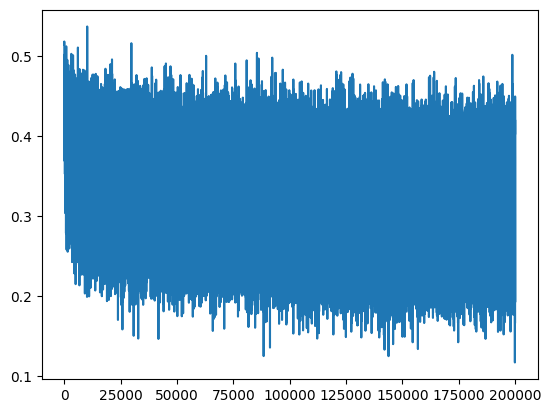

In [231]:
plt.plot(iterations, losses)
plt.show()

layer 2 (      Tanh): mean -0.02, std 0.70, saturated: 16.88%
layer 5 (      Tanh): mean -0.02, std 0.74, saturated: 18.12%
layer 8 (      Tanh): mean +0.01, std 0.77, saturated: 18.88%
layer 11 (      Tanh): mean +0.01, std 0.77, saturated: 18.31%
layer 14 (      Tanh): mean +0.01, std 0.78, saturated: 20.84%


Text(0.5, 1.0, 'activation distribution')

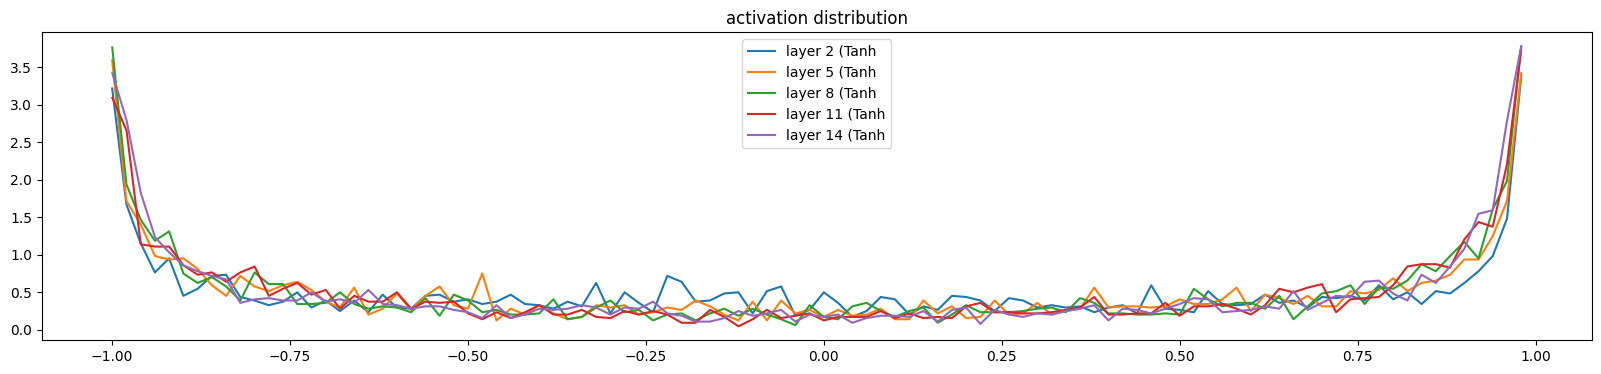

In [232]:
# visualize histograms for activations
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out
    print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean()*100))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('activation distribution')

layer 2 (      Tanh): mean +0.000000, std 4.761475e-03
layer 5 (      Tanh): mean -0.000000, std 4.515449e-03
layer 8 (      Tanh): mean +0.000000, std 4.195937e-03
layer 11 (      Tanh): mean +0.000000, std 3.937511e-03
layer 14 (      Tanh): mean -0.000000, std 4.098115e-03


Text(0.5, 1.0, 'gradient distribution')

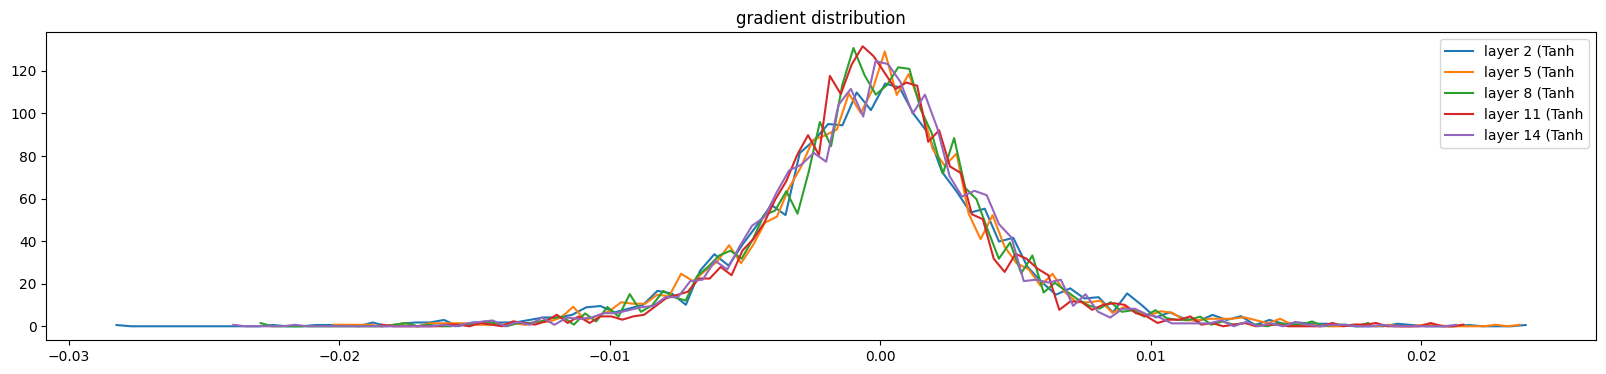

In [233]:
# visualize histograms for gradients
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out.grad
    print('layer %d (%10s): mean %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('gradient distribution')

weight   (27, 10) | mean +0.000000 | std 2.307783e-02 | grad:data ratio 2.164755e-02
weight  (30, 100) | mean +0.000034 | std 1.243865e-02 | grad:data ratio 3.532967e-02
weight (100, 100) | mean -0.000048 | std 7.284025e-03 | grad:data ratio 3.424059e-02
weight (100, 100) | mean -0.000194 | std 7.932691e-03 | grad:data ratio 3.770301e-02
weight (100, 100) | mean -0.000039 | std 7.226221e-03 | grad:data ratio 3.594316e-02
weight (100, 100) | mean +0.000031 | std 6.331312e-03 | grad:data ratio 3.354680e-02
weight  (100, 27) | mean +0.000066 | std 1.038624e-02 | grad:data ratio 3.374692e-02


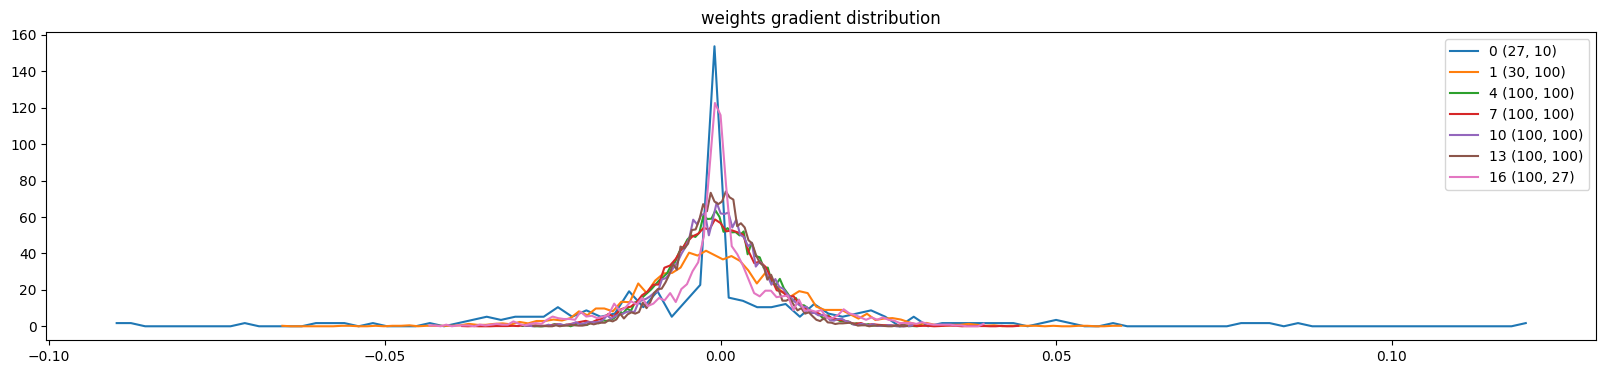

In [234]:
# visualize histograms
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i,p in enumerate(parameters):
  t = p.grad
  if p.ndim == 2:
    print('weight %10s | mean %+f | std %e | grad:data ratio %e' % (tuple(p.shape), t.mean(), t.std(), t.std() / p.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'{i} {tuple(p.shape)}')
plt.legend(legends)
plt.title('weights gradient distribution');

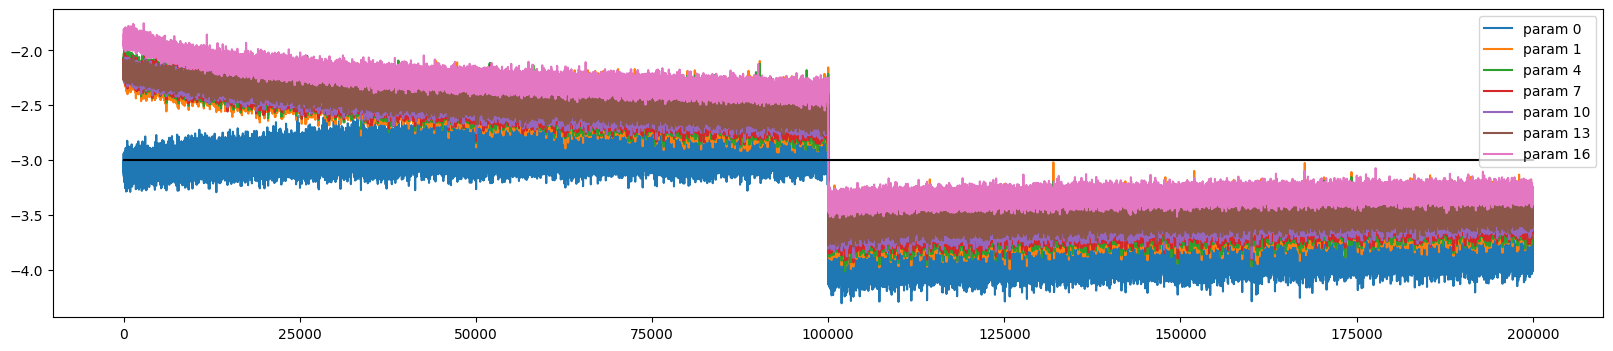

In [224]:
plt.figure(figsize=(20, 4))
legends = []
for i,p in enumerate(parameters):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
plt.legend(legends);

In [225]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (val_X, val_Y),
    'test': (test_X, test_Y),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  x = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, y)
  print(split, loss.item())

# put layers into eval mode
for layer in layers:
  layer.training = False
split_loss('train')
split_loss('val')

train 2.1351370811462402
val 2.086768865585327


In [227]:
for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      # forward pass the neural net
      emb = C[torch.tensor([context])] # (1,block_size,n_embd)
      x = emb.view(emb.shape[0], -1) # concatenate the vectors
      for layer in layers:
        x = layer(x)
      logits = x
      probs = F.softmax(logits, dim=1)
      # sample from the distribution
      ix = torch.multinomial(probs, num_samples=1).item()
      # shift the context window and track the samples
      context = context[1:] + [ix]
      out.append(ix)
      # if we sample the special '.' token, break
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

lynn.
myca.
chrishanie.
mahmanus.
zippersyotto.
makenatal.
jayah.
ariell.
brandra.
khoddekkieanayslee.
emelle.
mathld.
piea.
elle.
cena.
triuma.
camilifariah.
ani.
traide.
jhaun.


In [ ]:
# # train set
# emb = C[X_train]
# hpreact = emb.view(-1, 30) @ W1

# bnmeani = hpreact.mean(0, keepdim=True)
# bnstdi = hpreact.std(0, keepdim=True)

# hpreact = (bngain * ((hpreact - bnmeani)) / (bnstdi + 0.001)) + bnbias

# h = torch.tanh(hpreact)
# logits = h @ W2 + b2
# loss = F.cross_entropy(logits, Y_train)
# loss

tensor(2.0667, grad_fn=<NllLossBackward0>)

In [ ]:
# emb = C[val_X]
# hpreact = emb.view(-1, 30) @ W1

# bnmeani = hpreact.mean(0, keepdim=True)
# bnstdi = hpreact.std(0, keepdim=True)

# hpreact = (bngain * ((hpreact - bnmeani)) / (bnstdi + 0.001)) + bnbias
# #
# h = torch.tanh(hpreact)
# logits = h @ W2 + b2
# loss = F.cross_entropy(logits, val_Y)
# loss

tensor(2.1130, grad_fn=<NllLossBackward0>)

In [ ]:
# emb = C[test_X]
# hpreact = emb.view(-1, 30) @ W1

# bnmeani = hpreact.mean(0, keepdim=True)
# bnstdi = hpreact.std(0, keepdim=True)

# hpreact = (bngain * ((hpreact - bnmeani)) / (bnstdi + 0.001)) + bnbias

# h = torch.tanh(hpreact)
# logits = h @ W2 + b2
# loss = F.cross_entropy(logits, test_Y)
# loss

tensor(2.1127, grad_fn=<NllLossBackward0>)

In [ ]:
# g = torch.Generator().manual_seed(2147483647)

# block_size = 3

# for i in range(20):

#   context = [0] * block_size
#   out = []
#   while True:

#     emb = C[torch.tensor([context])]
#     hpreact = emb.view(-1, 30) @ W1

#     bnmeani = hpreact.mean(0, keepdim=True)
#     bnstdi = hpreact.std(0, keepdim=True)

#     hpreact = (bngain * ((hpreact - bnmeani)) / (bnstdi + 0.001)) + bnbias
#     h = torch.tanh(hpreact)

#     logits = h @ W2 + b2
#     probs = F.softmax(logits, dim=1)
#     idx = torch.multinomial(probs, num_samples=1, generator=g).item()
#     context = context[1:] + [idx]
#     if idx == 0:
#       break
#     out.append(idx)

#   print(''.join(itos[j] for j in out))




/tmp/ipython-input-117-2039021057.py:15: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  bnstdi = hpreact.std(0, keepdim=True)


RuntimeError: probability tensor contains either `inf`, `nan` or element < 0